In [5]:
import pandas as pd
import numpy as np

In [6]:
train_features = pd.read_csv('train_features.csv')
train_targets_scored = pd.read_csv('train_targets_scored.csv')


In [7]:
vals = train_targets_scored.sum()[1:].sort_values()

In [8]:
vals.tail(10)

egfr_inhibitor                    336
cdk_inhibitor                     340
adrenergic_receptor_antagonist    360
glutamate_receptor_antagonist     367
dna_inhibitor                     402
serotonin_receptor_antagonist     404
dopamine_receptor_antagonist      424
cyclooxygenase_inhibitor          435
proteasome_inhibitor              726
nfkb_inhibitor                    832
dtype: object

In [9]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [10]:
train_features.cp_type.value_counts()
#ctl_vehicle should be removed

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [11]:
train_features.cp_time.value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [12]:
train_features.cp_dose.value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

In [13]:
train_features[train_features['cp_type'].str.contains('ctl_vehicle')]

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,ctl_vehicle,48,D1,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,ctl_vehicle,24,D1,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,ctl_vehicle,24,D2,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,ctl_vehicle,48,D2,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,...,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,ctl_vehicle,24,D2,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,...,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,ctl_vehicle,24,D1,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,...,0.6085,0.1621,-0.2065,0.8314,-0.1891,-0.0074,0.2131,-0.1419,-0.2422,0.0457
23747,id_ff469c482,ctl_vehicle,72,D1,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,-0.2447,...,0.8209,0.7366,0.5468,1.1450,0.5254,0.6224,-0.9630,0.8872,-0.0742,-0.6777
23768,id_ff89331ca,ctl_vehicle,72,D2,-0.1051,0.4335,0.3648,-0.0525,-0.3632,-0.3228,...,-0.1219,0.4885,0.4963,0.9434,-0.4779,0.6951,0.9517,-0.8110,-0.1748,-0.3626
23793,id_ffd26f361,ctl_vehicle,48,D2,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082


In [27]:
Genes = train_features.iloc[:,4:775]

In [28]:
Cells = train_features.iloc[:,776:876]

In [36]:
GeneSum = np.sum(Genes, axis = 1)
CellSum = np.sum(Cells, axis = 1)
Genemax = np.max(Genes, axis = 1)
Cellmax = np.max(Cells, axis = 1)
Genemin = np.min(Genes, axis = 1)
Cellmin = np.min(Cells, axis = 1)
Genemean = np.mean(Genes, axis = 1)
Cellmean = np.mean(Cells, axis = 1)
Genestd = np.std(Genes, axis = 1)
Cellstd = np.std(Cells, axis = 1)

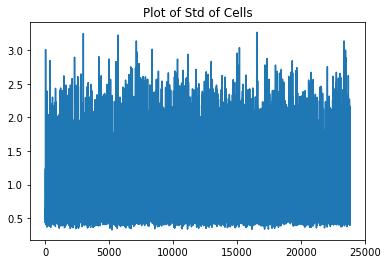

In [45]:
Cellstd.plot(title = "Plot of Std of Cells")

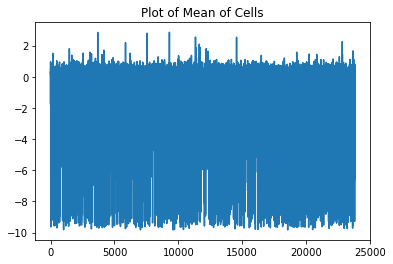

In [50]:
Cellmean.plot(title = "Plot of Mean of Cells")

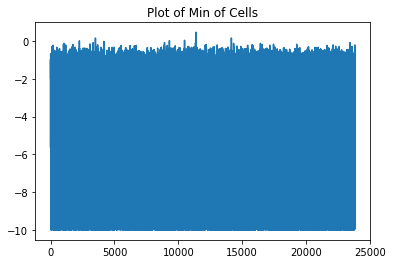

In [47]:
Cellmin.plot(title = "Plot of Min of Cells")

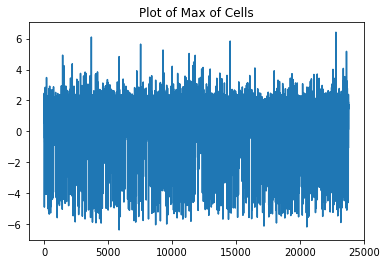

In [48]:
Cellmax.plot(title = "Plot of Max of Cells")

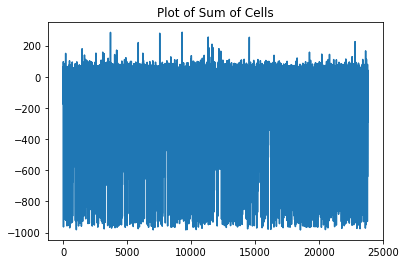

In [49]:
CellSum.plot(title = "Plot of Sum of Cells")

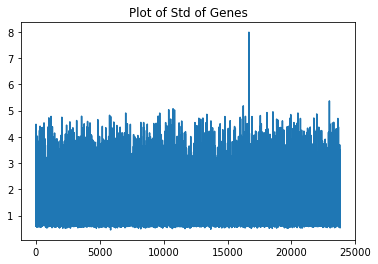

In [44]:
Genestd.plot(title = "Plot of Std of Genes")

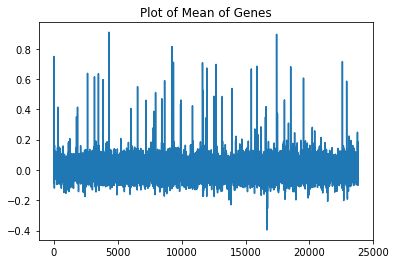

In [43]:
Genemean.plot(title = "Plot of Mean of Genes")

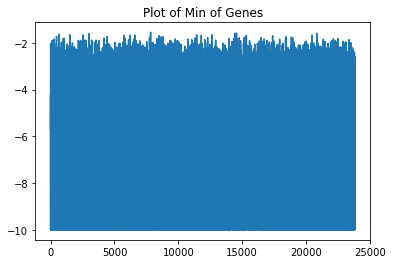

In [41]:
Genemin.plot(title = "Plot of Min of Genes")

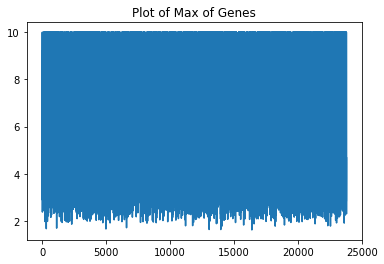

In [40]:
Genemax.plot(title = "Plot of Max of Genes")

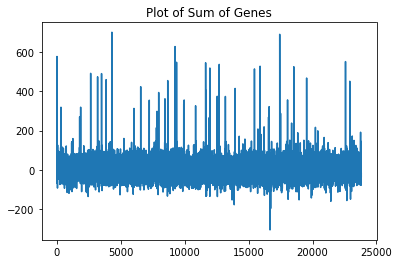

In [39]:
GeneSum.plot(title = "Plot of Sum of Genes")

In [ ]:
CellSum.plot(title = "Plot of Sum of Cells")

In [29]:
Genes

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,...,1.1980,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.5099,-0.1423
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,...,0.5157,-0.0858,0.3606,-0.0248,0.0672,-0.5901,-0.1022,0.5247,0.5438,-0.1875
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,-0.7633,0.1796,0.3488,0.0927,0.5166,-0.3099,-0.5946,0.9778,0.2326,-0.6191
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,...,-5.5030,-0.1410,1.9590,0.8224,1.2500,-3.1930,-2.8720,0.1794,0.3109,-0.3491


In [30]:
Cells

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.4224,0.1871,-0.4822,0.3713,0.4754,0.9512,0.4650,0.3005,0.0338,-0.7734,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,0.2144,0.4350,0.1174,1.3960,-0.6772,0.2316,-0.5396,0.0581,0.6067,-0.4622,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,1.0650,0.6329,0.3742,0.1237,0.6147,0.4589,-0.2372,1.1160,0.4623,0.2830,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,0.5377,1.3240,0.9679,0.1419,1.2230,0.3404,-0.1589,0.8667,0.7749,-0.1458,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [44]:
train_targets_scored['sig_id'].sort_values()
train_features['sig_id'].sort_values

<bound method Series.sort_values of 0        id_000644bb2
1        id_000779bfc
2        id_000a6266a
3        id_0015fd391
4        id_001626bd3
             ...     
23809    id_fffb1ceed
23810    id_fffb70c0c
23811    id_fffc1c3f4
23812    id_fffcb9e7c
23813    id_ffffdd77b
Name: sig_id, Length: 23814, dtype: object>

In [45]:
train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Together = []
Together = pd.concat([train_features,train_targets_scored],axis=1) 

In [47]:
Controlled = Together[Together['cp_type'].str.contains('trt_cp')]

In [48]:
Controlled

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,id_fff8c2444,trt_cp,72,D1,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,...,0,0,0,0,0,0,0,0,0,0
23809,id_fffb1ceed,trt_cp,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,trt_cp,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,trt_cp,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,0,0,0,0,0,0,0,0,0,0


In [49]:
D1_24 = Controlled[Controlled['cp_dose'].str.contains('D1')]
D1_24 = Controlled[Controlled['cp_time'].astype(str).str.contains('24')]
D2_24 = Controlled[Controlled['cp_dose'].str.contains('D2')]
D2_24 = Controlled[Controlled['cp_time'].astype(str).str.contains('24')]
D1_48 = Controlled[Controlled['cp_dose'].str.contains('D1')]
D1_48 = Controlled[Controlled['cp_time'].astype(str).str.contains('48')]
D2_48 = Controlled[Controlled['cp_dose'].str.contains('D2')]
D2_48 = Controlled[Controlled['cp_time'].astype(str).str.contains('48')]
D1_72 = Controlled[Controlled['cp_dose'].str.contains('D1')]
D1_72 = Controlled[Controlled['cp_time'].astype(str).str.contains('72')]
D2_72 = Controlled[Controlled['cp_dose'].str.contains('D2')]
D2_72 = Controlled[Controlled['cp_time'].astype(str).str.contains('72')]

In [50]:
D2_72

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0
10,id_002452c7e,trt_cp,72,D2,-0.2875,0.0322,-0.8863,-0.0016,-0.7471,-0.3890,...,0,0,0,0,0,0,0,0,0,0
14,id_002d31e2c,trt_cp,72,D1,0.4242,1.7040,-1.3230,-0.3163,-0.4642,-2.3810,...,0,0,0,0,0,0,0,0,0,0
18,id_003603254,trt_cp,72,D2,-0.4694,-1.5180,-2.0430,0.5750,0.5077,0.2880,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23797,id_ffe6452ba,trt_cp,72,D2,-0.6087,-0.4014,-2.6870,-0.7211,0.0211,0.5130,...,0,0,0,0,0,0,0,0,0,0
23798,id_fff11dbf5,trt_cp,72,D2,-0.5946,0.1265,-2.1300,0.5877,-0.0638,1.2800,...,0,0,0,0,0,0,0,0,0,0
23800,id_fff1a3307,trt_cp,72,D2,-0.4330,-1.3590,-0.3701,0.7571,0.6822,-0.1997,...,0,0,0,0,0,0,0,0,0,0
23808,id_fff8c2444,trt_cp,72,D1,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_D1_24 = D1_24.iloc[:,4:876]
X_D1_24 = X_D1_24.head(10000)

In [52]:
Y_D1_24 = D1_24.loc[:,'5-alpha_reductase_inhibitor':'wnt_inhibitor']

In [53]:
Y_D1_24 = Y_D1_24[["cdk_inhibitor","egfr_inhibitor","adrenergic_receptor_antagonist","glutamate_receptor_antagonist","dna_inhibitor","serotonin_receptor_antagonist","dopamine_receptor_antagonist","cyclooxygenase_inhibitor","cyclooxygenase_inhibitor","proteasome_inhibitor","nfkb_inhibitor"]]                          
Y_D1_24 = Y_D1_24.head(10000)

In [54]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit_transform(X_D1_24)      

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(std, Y_D1_24, test_size=0.3)

In [56]:
model = RandomForestClassifier(n_estimators=50)

# Fit on training data
model.fit(train, train_labels)

RandomForestClassifier(n_estimators=50)

In [57]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)

In [58]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_labels, rf_probs, pos_label=2)

In [60]:

#results['recall'] = recall_score(test_labels, rf_predictions)
#results['precision'] = precision_score(test_labels, rf_predictions)
#results['roc'] = roc_auc_score(test_labels, rf_probs)

#train_results = {}
#train_results['recall'] = recall_score(train_labels, train_rf_predictions)
#train_results['precision'] = precision_score(train_labels, train_rf_predictions)
ROC = roc_auc_score(test_labels, rf_predictions)

In [61]:
ROC

0.6057461442707344

In [62]:
ROC = roc_auc_score(train_labels, train_rf_predictions)

In [63]:
ROC

0.989246196360412